$$
\newcommand{\dr}{\partial}
\newcommand{\dd}{\mathrm{d}}
\newcommand{\weffsq}{\tilde\omega_n^2 }
$$

In [23]:
from measurements import ConfResults, EnsembleResults

In [47]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Free case

In this notebook we consider the free case

$$
\dr_t \phi = -\Gamma\left(-\Delta +m^2\right)\phi+ \xi
$$

with $\Delta \phi = \frac{1}{a}\left(\sum_i \phi_{+i}+\sum_i\phi_{-i}-6\phi\right)$. In Fourier space, this reads

$$
\begin{align}
\dr_t \phi_n &= -\Gamma(\tilde k_n^2+m^2)\phi_n + \xi\\
&=-\Gamma \tilde\weffsq\phi_n + \xi
\end{align}
$$

and $\tilde k$ is a lattice momentum $-\tilde k^2_n=\frac{2}{a}\left(\cos\left(\frac{2 \pi n }{N}\right) - 1\right)$.

### Backward Euler

$$
\begin{align}
\phi_n^s=\phi_n^{s-1}-\dd t \Gamma \weffsq\phi_n^s + W^s\dd t \\
\implies \phi_n^s = \frac{1}{1+\dd t \Gamma \weffsq}\left(\phi_n^{s-1}+W^s\dd t \right)
\end{align}
$$

We can solve this recursion

$$
\begin{align}
\phi_n^1 &= \frac{W^1\dd t }{1+\dd t \Gamma \weffsq} \\ 
\phi_n^2 & = \frac{W^1\dd t }{(1+\dd t \Gamma \weffsq)^2} + \frac{W^2\dd t }{1+\dd t \Gamma \weffsq} \\
\phi_n^S & = \sum_{s=1}^S \frac{W^s\dd t }{(1+\dd t \Gamma \weffsq)^{S+1-s}} \ ,
\end{align}
$$

and compute moments. In particular, we get (the $W$s are independent)

$$
\begin{align}
\phi_n^1 &= \frac{W^1\dd t }{1+\dd t \Gamma \weffsq} \\ 
\phi_n^2 & = \frac{W^1\dd t }{(1+\dd t \Gamma \weffsq)^2} + \frac{W^2\dd t }{1+\dd t \Gamma \weffsq} \\
\left<\phi_n^S \phi_{-n}^S\right> & =2\Gamma \dd t \sum_{s=1}^S \frac{1}{(1+\dd t \Gamma \weffsq)^{2(S+1-s)}} \\
&=\frac{2\Gamma \dd t}{2\dd t \Gamma \weffsq +\dd t^2 \Gamma^2 \tilde\omega_n^4 } \left(1-\frac{1}{(1+\dd t \Gamma \weffsq)^{2S}}\right)
\end{align}
$$


In [130]:
def free2pt(n, m, dt, N, Γ=1, a=1, S=np.inf):
    kn2 = -2.0 / a * (np.cos(2.0 * np.pi * n / N) - 1.0)
    ω2n = m**2 + kn2
    
    
    res = 2 * Γ * dt / (2 * Γ * dt * ω2n + dt**2 * Γ**2 * ω2n**2)
    
    if not S==np.inf:
        res *=(1.0 - 1.0 /(1.0 + Γ * dt * ω2n )**(2.0*S) )
    
    return res

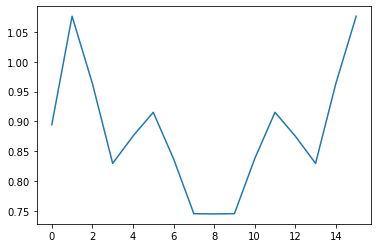

In [157]:
fx = np.asarray([free2pt(n,0.25*2.0, 0.1, 16) for n in range(16)])
#plt.plot(fx)
#plt.plot(fx)
plt.plot(fx/test/2.0/np.pi**2)

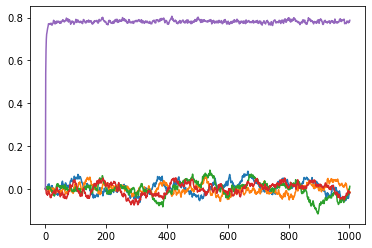

In [139]:
fn = "./freeCase/N16Free.h5"
r = h5py.File(fn,'r')
plt.plot(r["phi"])
#plt.yscale('log')

In [140]:
res = ConfResults(fn,100,1)

In [141]:
res.wallXFourier0()
phiK2 = [[np.abs(res.wallXphi0F[t][k])**2 for k in range(len(res.wallXphi0F[t]))] for t in range(len(res.wallXphi0F)) ] 
#corrK = np.real(corrK)
test=np.mean(phiK2,axis=0) 

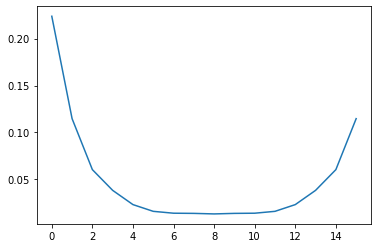

In [142]:
plt.plot(test)

In [58]:
corrK

array([0.01275749+0.00000000e+00j, 0.01076797+2.16840434e-19j,
       0.00912058+0.00000000e+00j, 0.00744998+2.71050543e-19j,
       0.00635229+4.33680869e-19j, 0.00608296+1.62630326e-19j,
       0.00539192+0.00000000e+00j, 0.0050057 +1.08420217e-19j,
       0.00476758+0.00000000e+00j, 0.0050057 -1.08420217e-19j,
       0.00539192+0.00000000e+00j, 0.00608296-1.62630326e-19j,
       0.00635229-4.33680869e-19j, 0.00744998-2.71050543e-19j,
       0.00912058+0.00000000e+00j, 0.01076797-2.16840434e-19j])